In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from pprint import pprint as pp
# import cvxpy as cp
from Market_Data.yahoo_finance_loader import yahoo_data as yahoo

In [14]:
### Configuration ####
base_dir = os.getcwd()
data_dir =  os.path.join(base_dir , 'Market_Data')

use_yahoo_scrapping = False

### Defined Outcome Fund  cap and buffer setting ###
# https://www.innovatoretfs.com/etf/default.aspx?ticker=pmay
cap = 1.1390
buffer = 0.8500

In [15]:
ticker_data = os.path.join(data_dir , 'EMP_ticker.xlsx')
etf_map = pd.read_excel(ticker_data, sheet_name = 'ticker_etf')

#example of ETF managed portfolio is from KTB Asset Management in Korea
etfs = ['VLUE' ,'IVW' ,'XBI' ,'XLB' ,'XLI' ,'KRE' ,'SOXX' ,'VGK' ,'IEMG' ,'TAN' ,
        'DVY' ,'IGF' ,'REM' ,'VRP' ,'CWB' ,'EMB' ,'HYG' ,'BKLN' ,'BNDX' ,'LQD']
# representative bond etf for simulation
bond_ticker = ['ISTB', 'ILTB','AGG']

# asset classes for defined outcome etf
do_ticker = ['SPY' , 'AGG']

# representative etf of each asset classes
ASSET_ETFS = ['SPY', 'TLT', 'XLF', 'XLE', 'XLU', 'XLK', 'XLB', 'XLP', 'XLY', 'XLI', 'XLV']

In [16]:
if use_yahoo_scrapping == True:
    etf_01 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[0,1])
    etf_02 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[1,1])
    etf_03 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[2,1])
    etf_04 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[3,1])
    etf_05 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[4,1])
    etf_06 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[5,1])
    etf_07 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[6,1])
    etf_08 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[7,1])
    etf_09 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[8,1])
    etf_10 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[9,1])
    etf_11 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[10,1])
    etf_12 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[11,1])
    etf_13 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[12,1])
    etf_14 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[13,1])
    etf_15 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[14,1])
    etf_16 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[15,1])
    etf_17 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[16,1])
    etf_18 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[17,1])
    etf_19 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[18,1])
    etf_20 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,etf_map.iloc[19,1])

    risk_free = yahoo.monthly_price_data_loading('2015-01-02', '2021-01-31' ,'^TNX')
    spy = yahoo.monthly_price_data_loading('2015-01-02', '2021-01-31' ,'SPY')

    bond_01 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,'ISTB')
    bond_02 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,'ILTB')
    bond_03 = yahoo.daily_price_data_loading('2015-01-02', '2021-01-31' ,'AGG')

    etf_portfolio = pd.DataFrame(columns = etf_map['Ticker'].values)
    etf_portfolio[etfs[0]] = etf_01['adjclose']
    etf_portfolio[etfs[1]] = etf_02['adjclose']
    etf_portfolio[etfs[2]] = etf_03['adjclose']
    etf_portfolio[etfs[3]] = etf_04['adjclose']
    etf_portfolio[etfs[4]] = etf_05['adjclose']
    etf_portfolio[etfs[5]] = etf_06['adjclose']
    etf_portfolio[etfs[6]] = etf_07['adjclose']
    etf_portfolio[etfs[7]] = etf_08['adjclose']
    etf_portfolio[etfs[8]] = etf_09['adjclose']
    etf_portfolio[etfs[9]] = etf_10['adjclose']
    etf_portfolio[etfs[10]] = etf_11['adjclose']
    etf_portfolio[etfs[11]] = etf_12['adjclose']
    etf_portfolio[etfs[12]] = etf_13['adjclose']
    etf_portfolio[etfs[13]] = etf_14['adjclose']
    etf_portfolio[etfs[14]] = etf_15['adjclose']
    etf_portfolio[etfs[15]] = etf_16['adjclose']
    etf_portfolio[etfs[16]] = etf_17['adjclose']
    etf_portfolio[etfs[17]] = etf_18['adjclose']
    etf_portfolio[etfs[18]] = etf_19['adjclose']
    etf_portfolio[etfs[19]] = etf_20['adjclose']

    bond_portfolio = pd.DataFrame(columns = bond_ticker)
    bond_portfolio[bond_ticker[0]] = bond_01['adjclose']
    bond_portfolio[bond_ticker[1]] = bond_02['adjclose']
    bond_portfolio[bond_ticker[2]] = bond_03['adjclose']
    
    defined_outcome = pd.DataFrame(columns = do_ticker )
    defined_outcome[do_ticker[0]] = spy['adjclose']
    defined_outcome[do_ticker[1]] = bond_03['adjclose']
    

    # save crawling result to dataframe and save in local adress
    etf_portfolio_std =  pd.DataFrame(columns = etf_portfolio.columns)
    bond_portfolio_std = pd.DataFrame(columns = bond_portfolio.columns)
    defined_outcome_std = pd.DataFrame(columns = defined_outcome.columns)
    
    etf_portfolio_daily_return =  pd.DataFrame(columns = etf_portfolio.columns)
    bond_portfolio_daily_return =  pd.DataFrame(columns = bond_portfolio.columns )
    defined_outcome_monthly_return = pd.DataFrame(columns = defined_outcome.columns)

    for col in etf_portfolio.columns:
        etf_portfolio_std[col] = etf_portfolio[col]/etf_portfolio[col][0]
    for col in bond_portfolio.columns:
        bond_portfolio_std[col] = bond_portfolio[col]/bond_portfolio[col][0]
    for col in defined_outcome.columns:
        defined_outcome_std[col] = defined_outcome[col]/defined_outcome[col][0]

    for col in etf_portfolio.columns:
        etf_portfolio_daily_return[col] = np.log(etf_portfolio[col]/etf_portfolio[col].shift(1))
        etf_portfolio_daily_return[col][0] = 0.0000

    for col in bond_portfolio.columns:
        bond_portfolio_daily_return[col] = np.log(bond_portfolio[col]/bond_portfolio[col].shift(1))
        bond_portfolio_daily_return[col][0] = 0.0000
        
    for col in defined_outcome.columns:
        defined_outcome_monthly_return[col] = np.log(defined_outcome[col]/defined_outcome[col].shift(1))
        defined_outcome_monthly_return[col][0] = 0.0000

    etf_portfolio_std.set_index('formatted_date', drop = False)
    bond_portfolio_std.set_index('formatted_date', drop = False)
    defined_outcome_std.set_index('formatted_date', drop = False)
    etf_portfolio_daily_return.set_index('formatted_date', drop = False)
    bond_portfolio_daily_return.set_index('formatted_date', drop = False)
    defined_outcome_monthly_return.set_index('formatted_date', drop = False)

    risk_free_monthly = pd.DataFrame(risk_free['adjclose'])
    
    etf_excel = pd.ExcelWriter(os.path.join(data_dir,'daily_etf_portfolio.xlsx') , engine ='xlsxwriter')
    bond_excel = pd.ExcelWriter(os.path.join(data_dir,'daily_bond_portfolio.xlsx') , engine ='xlsxwriter')
    defined_outcome_excel = pd.ExcelWriter(os.path.join(data_dir, 'monthly_do_portfolio.xlsx') , engine = 'xlsxwriter')
    
    
    etf_portfolio_std.to_excel(etf_excel, sheet_name = 'daily_stadardized')
    bond_portfolio_std.to_excel(bond_excel, sheet_name = 'daily_stadardized')
    defined_outcome_std.to_excel(defined_outcome_excel , sheet_name ='monthly_standardized')
    
    etf_portfolio_daily_return.to_excel(etf_excel , sheet_name = 'daily_return')
    bond_portfolio_daily_return.to_excel(bond_excel, sheet_name = 'daily_return')
    defined_outcome_monthly_return.to_excel(defined_outcome_excel , sheet_name = 'monthly_return')
    
    etf_excel.save()
    bond_excel.save()
    defined_outcome_excel.save()
    
    # download risk_free rate = 10 year treasury bill yield
    risk_free_monthly.to_excel(os.path.join(data_dir,'risk_free.xlsx'), sheet_name = 'risk_free_monthly')
    risk_free_rate = 1.00
    for i in range (risk_free.shape[0]):
        risk_free_rate = risk_free_rate * (1+(risk_free_monthly['adjclose'][i]/100))
    risk_free_rate = 100 * ((risk_free_rate**(1/risk_free_monthly.shape[0]))-1)
    print("risk free rate is : ", risk_free_rate, "%  treasury bill 10 years yield")


else:
    etf_portfolio_daily_return = pd.read_excel(os.path.join(data_dir,'daily_etf_portfolio.xlsx') , sheet_name = 'daily_return' , index_col = 'formatted_date')
    bond_portfolio_daily_return = pd.read_excel(os.path.join(data_dir,'daily_bond_portfolio.xlsx') , sheet_name = 'daily_return' ,index_col = 'formatted_date')
    defined_outcome_monthly_return = pd.read_excel(os.path.join(data_dir,'monthly_do_portfolio.xlsx') , sheet_name = 'monthly_return', index_col = 'formatted_date')
    
    etf_portfolio_std = pd.read_excel(os.path.join(data_dir,'daily_etf_portfolio.xlsx') , sheet_name = 'daily_stadardized',index_col = 'formatted_date')
    bond_portfolio_std = pd.read_excel(os.path.join(data_dir,'daily_bond_portfolio.xlsx') , sheet_name = 'daily_stadardized',index_col = 'formatted_date')
    defined_outcome_std = pd.read_excel(os.path.join(data_dir,'monthly_do_portfolio.xlsx') , sheet_name = 'monthly_standardized',index_col = 'formatted_date')
    
    risk_free = pd.read_excel(os.path.join(data_dir,'risk_free.xlsx'), sheet_name = 'risk_free_monthly')
    
    risk_free_rate = 1.00
    for i in range (risk_free.shape[0]):
        risk_free_rate = risk_free_rate * (1+(risk_free['adjclose'][i]/100))
    risk_free_rate = 100 * ((risk_free_rate**(1/risk_free.shape[0]))-1)
    
    print("loaded equity portfolio data succesfully")
    print("loaded bond portfolio data succesfully")
    print("loaded defined outcome portfolio succesfully")
    print("risk free rate is : ", risk_free_rate, "%  treasury bill 10 years yield")

loaded equity portfolio data succesfully
loaded bond portfolio data succesfully
loaded defined outcome portfolio succesfully
risk free rate is :  1.9915383627844951 %  treasury bill 10 years yield


In [17]:
etf_portfolio_daily_return

BNDX      VLUE       IVW       XBI       XLB       XLI  \
formatted_date                                                               
2015-01-02      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-01-05      0.997499  0.999625  1.000000  0.985112  1.003132  0.974512   
2015-01-06      0.994582  1.001875  0.979201  0.975874  0.978186  0.965879   
2015-01-07      0.994165  1.001125  0.987001  0.989686  1.017303  0.976773   
2015-01-08      0.996249  1.000750  1.007035  1.008251  1.039860  1.000000   
2015-01-09      0.997083  1.000188  0.997553  1.000986  1.040656  0.994861   
2015-01-12      0.996666  1.002437  0.987154  0.993722  1.050528  0.992600   
2015-01-13      0.997916  1.003375  0.984401  0.992377  1.042779  0.981501   
2015-01-14      0.997499  1.005811  0.976602  0.988251  1.058968  0.969990   
2015-01-15      0.994782  1.001125  0.967885  0.978027  1.019638  0.968140   
2015-01-16      0.999381  1.006936  0.980884  0.990404  1.050634  0.983556   
2015-01-20      0.999799  1.006561  0.977672  0.993632  1.062258  0.985201   
2015-01-21      1.000217  1.008060  0.985013  0.998296  1.031686  0.994861   
2015-01-22      1.002308  1.006749  0.992201  1.014170  1.042832  1.007400   
2015-01-23      1.004399  1.012746  0.995412  1.011480  1.054032  0.991778   
2015-01-26      1.004817  1.011434  0.993883  1.013543  1.083860  0.996095   
2015-01-27      1.003563  1.010497  0.989754  0.996502  1.086301  0.989312   
2015-01-28      1.001890  1.012746  0.969567  0.987892  1.057216  0.971429   
2015-01-29      1.004399  1.011809  0.977672  0.997937  1.072184  0.984173   
2015-01-30      1.002308  1.013309  0.967885  0.984305  1.059657  0.980267   
2015-02-02      1.004399  1.014848  0.965132  0.993273  1.042939  0.989106   
2015-02-03      1.006071  1.012596  0.998471  1.004843  1.039860  1.010894   
2015-02-04      1.002308  1.011657  1.001224  1.001704  1.018736  1.004317   
2015-02-05      1.006071  1.009780  1.006117  1.013184  1.048352  1.028572   
2015-02-06      1.004399  1.006777  1.009940  1.006457  1.034924  1.026105   
2015-02-09      1.005653  1.006214  0.999541  1.001435  1.029722  1.024872   
2015-02-10      1.006071  1.003774  1.008870  1.014708  1.053076  1.032477   
2015-02-11      1.006489  1.006590  1.010399  1.016502  1.049944  1.030833   
2015-02-12      1.007744  1.008091  1.020340  1.027085  1.072343  1.048510   
2015-02-13      1.007492  1.006026  1.024774  1.031659  1.079561  1.057349   
...                  ...       ...       ...       ...       ...       ...   
2020-12-16      1.183958  1.249448  1.538213  2.450366  2.333991  1.642023   
2020-12-17      1.183958  1.250301  1.538920  2.464415  2.368390  1.660969   
2020-12-18      1.186625  1.249448  1.520202  2.461293  2.382926  1.668362   
2020-12-21      1.184218  1.250515  1.512079  2.452318  2.422961  1.659516   
2020-12-22      1.182613  1.251582  1.498482  2.458952  2.443657  1.649299   
2020-12-23      1.186893  1.248501  1.512609  2.446854  2.443819  1.651621   
2020-12-24      1.189032  1.250426  1.514728  2.459732  2.425547  1.662070   
2020-12-28      1.191706  1.251282  1.515611  2.489001  2.368147  1.655568   
2020-12-29      1.189567  1.251710  1.513492  2.483928  2.298781  1.651621   
2020-12-30      1.190102  1.251924  1.520379  2.481196  2.329664  1.674376   
2020-12-31      1.191706  1.252352  1.534682  2.490562  2.276305  1.680878   
2021-01-04      1.189567  1.252565  1.521085  2.453488  2.279054  1.664856   
2021-01-05      1.193311  1.251282  1.539803  2.471049  2.270970  1.702240   
2021-01-06      1.194915  1.249571  1.579887  2.446464  2.317375  1.771899   
2021-01-07      1.197055  1.249785  1.600371  2.501489  2.412612  1.785134   
2021-01-08      1.200799  1.248929  1.593131  2.526855  2.417948  1.776543   
2021-01-11      1.195985  1.246362  1.604079  2.494074  2.394018  1.776543   
2021-01-12      1.200264  1.245079  1.625269  2.485098  2.414876  1.799066   
2021-01-13      1.201334  1.249999  1.6300

In [18]:
#True
print(etf_portfolio_daily_return.shape)
etf_portfolio_daily_return.columns

(1530, 20)


Index(['BNDX', 'VLUE', 'IVW', 'XBI', 'XLB', 'XLI', 'KRE', 'SOXX', 'VGK',
       'IEMG', 'TAN', 'DVY', 'IGF', 'REM', 'VRP', 'CWB', 'EMB', 'HYG', 'BKLN',
       'LQD'],
      dtype='object')

In [20]:
#False
print(etf_portfolio_daily_return.shape)
etf_portfolio_daily_return.columns

(1530, 20)


Index(['BNDX', 'VLUE', 'IVW', 'XBI', 'XLB', 'XLI', 'KRE', 'SOXX', 'VGK',
       'IEMG', 'TAN', 'DVY', 'IGF', 'REM', 'VRP', 'CWB', 'EMB', 'HYG', 'BKLN',
       'LQD'],
      dtype='object')

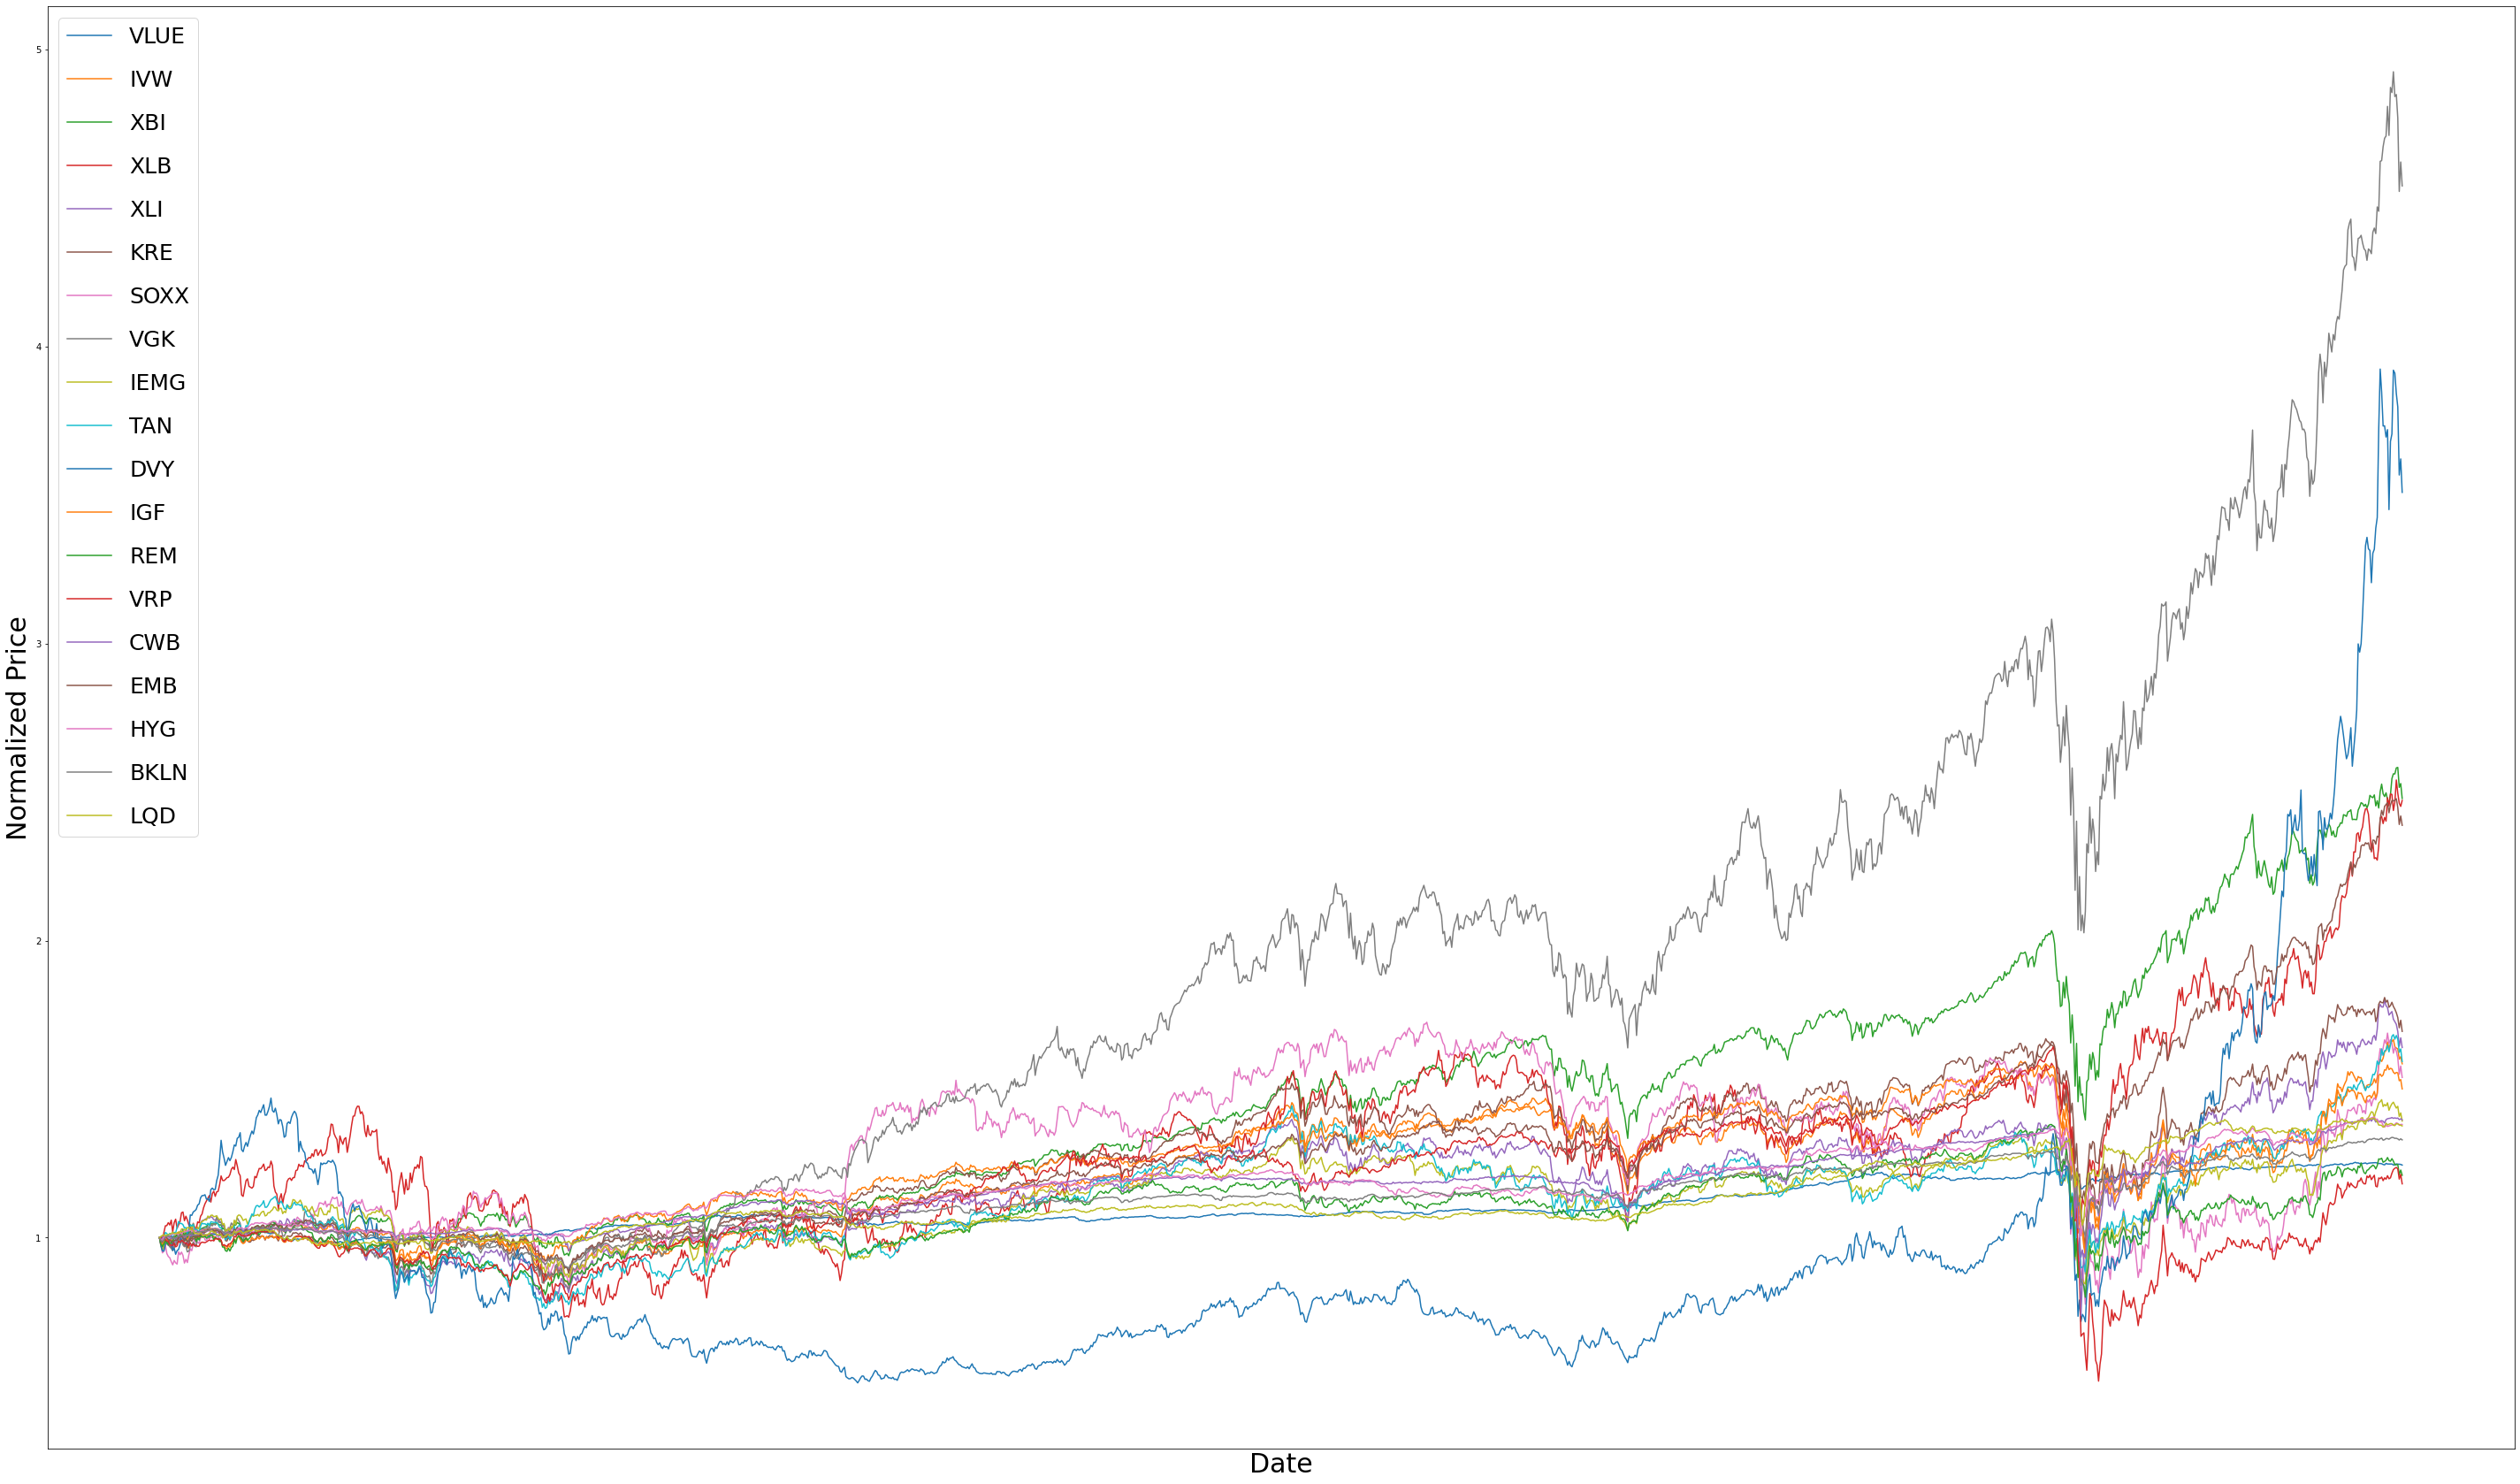

In [9]:
plt.figure(figsize=(50,30))
plt.xlabel('Date',fontsize = 30)
plt.ylabel('Normalized Price',fontsize = 30)
for i in range(1,etf_map.shape[0]):
    plt.plot(etf_portfolio_std.iloc[:,i], label = etf_map.iloc[i,1])
    #plt.plot(etf_portfolio_normalized.iloc[:,i])
plt.legend(labelspacing= 1.0 , fontsize = 25)
plt.xticks([])
plt.show()

In [13]:
# annualize mean and stedev of portfolio
mu = etf_portfolio_daily_return.mean() * (etf_portfolio_daily_return.shape[0]) / 252
sigma = etf_portfolio_daily_return.cov() * (etf_portfolio_daily_return.shape[0]) / np.sqrt(252)

#set number of runs of random portfolio weights
num_portfolios = 100000

results =  np.zeros((num_portfolios , len(etfs)+2))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(etf_portfolio_daily_return.shape[1]-1))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mu * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T , np.dot(sigma, weights) ))
  #  portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(sigma, weights))) * np.sqrt(etf_portfolio_daily_return.shape[0]/12)
    
    #store results in results array
    results[i,0] = portfolio_return
    results[i,1] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[i,2] = ((portfolio_return-(risk_free_rate/100)) / portfolio_std_dev)
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[i, j+3] = weights[j]

result_df = pd.DataFrame(results, columns = ['Mean', 'Stdev', 'Sharpe'] + etfs )
result_df.to_excel(os.path.join(data_dir ,'MarkowitzPortfolio.xlsx'))

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = result_df.iloc[result_df['Sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = result_df.iloc[result_df['Stdev'].idxmin()]

result_df

ValueError: operands could not be broadcast together with shapes (20,) (19,) 

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(10,10))
plt.scatter(result_df['Stdev'],result_df['Mean'],c=result_df['Sharpe'], s = 10)
plt.title("Portfolio Return and Variance",  fontsize = 10)
plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Returns', fontsize = 20)
print("optimal portfolio in market has Annual return" , round(100 * max_sharpe_port[0] / (etf_portfolio_daily_return.shape[0] /252) ,2) , "% volatility" , 100* round(max_sharpe_port[1]/(etf_portfolio_daily_return.shape[0] /252) ,2) ,"%")

### 2015 ~ 2020 EMP 펀드 모델링

<ipython-input-21-4458fbc23257>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_etf['bond'][0] = 0


Annual EMP Fund Average Return
EMP     0.125584
bond    0.034579
dtype: float64 

Annual volatility of EMP Fund
           EMP      bond
EMP   0.037881  0.000268
bond  0.000268  0.001983 



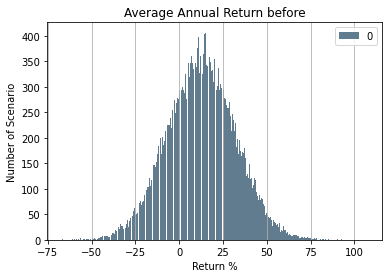

stock 0.1259865024530229
bond 0.034396849810607484


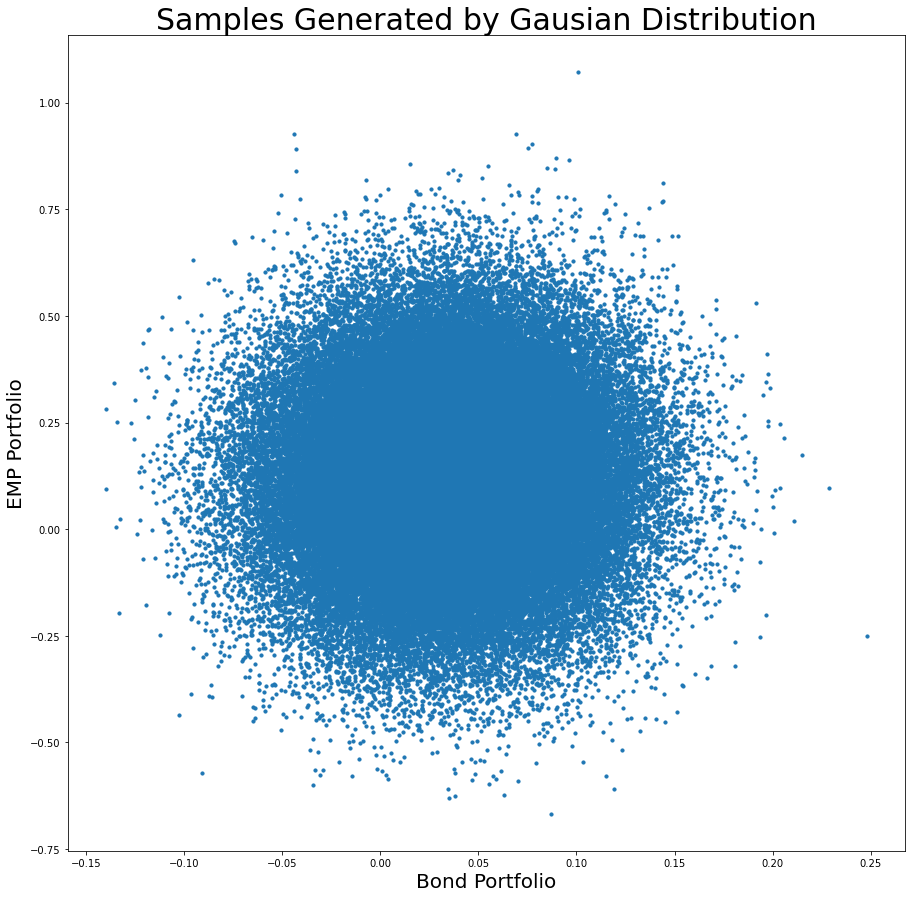

In [21]:
emp = np.dot(etf_portfolio_daily_return.iloc[:,1:] , np.array(max_sharpe_port[3:]))
treasury = (bond_portfolio_daily_return['AGG'])
emp_etf = pd.DataFrame(columns = ['EMP','bond'] , index = etf_portfolio_daily_return.index)
emp_etf['bond'] = treasury
emp_etf['bond'][0] = 0
emp_etf['EMP'] = emp

mu = emp_etf.mean() * 252
sigma = emp_etf.cov() * 252

# / (etf_portfolio_daily_return.shape[0] /252)

print("Annual EMP Fund Average Return")
print(mu , '\n')
print("Annual volatility of EMP Fund")
print(sigma , '\n' )

emp_etf['bond'] = emp_etf['bond']
emp_etf['EMP']  = emp_etf['EMP']

mu = mu.values.T
sigma = sigma.values

num_samples = 100000
stock, bond = np.random.multivariate_normal(mu, sigma, num_samples).T

aa = 100 * pd.DataFrame(stock)
aa.plot.hist(grid=True, bins=1000, rwidth=0.9,color='#607c8e')
plt.title('Average Annual Return before')
plt.xlabel('Return %')
plt.ylabel('Number of Scenario')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("stock", stock.mean())
print("bond",bond.mean())

plt.figure(figsize=(10,10))
plt.scatter(bond,stock, cmap = plt.cm.Reds, s = 10)
plt.xlabel("Bond Portfolio" , fontsize = 10)
plt.ylabel("EMP Portfolio" , fontsize = 10)
plt.title("Samples Generated by Gausian Distribution", fontsize = 10)
plt.show()

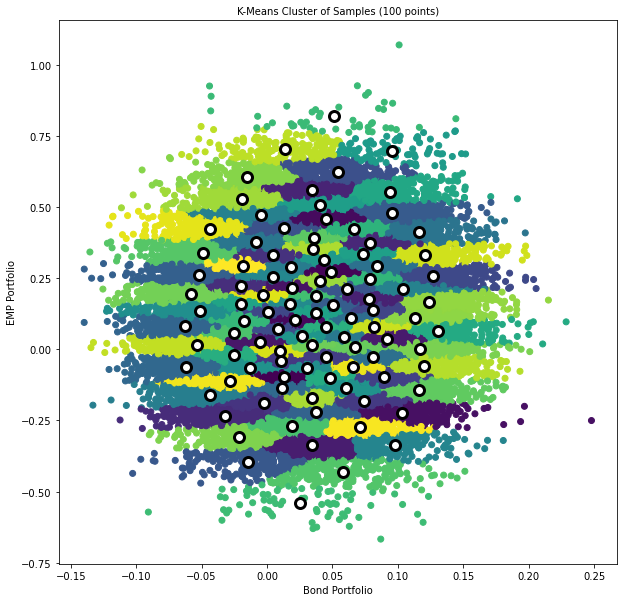

In [23]:
from sklearn.cluster import KMeans

num_clusters =100
kmeans = KMeans(n_clusters = num_clusters).fit(np.transpose([bond,stock]))

plt.figure(figsize=(10,10))
plt.scatter(bond, stock, c=kmeans.labels_)
plt.xlabel("Bond Portfolio" , fontsize = 10)
plt.ylabel("EMP Portfolio" , fontsize = 10)
plt.title("K-Means Cluster of Samples (100 points)", fontsize = 10)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,
           color='white', edgecolor = 'black', linewidth=3)

optiman asset allocation is stock:  22.732275074749776    bond : 77.26772492525033
optimal allocation: 22.73, 77.27
expected return: 5.52%


C:\Anaconda64\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
C:\Anaconda64\lib\site-packages\cvxpy\interface\numpy_interface\ndarray_interface.py:47: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtype in [numpy.complex, numpy.float64]:
C:\Anaconda64\lib\si

Text(0, 0.5, 'final wealth')

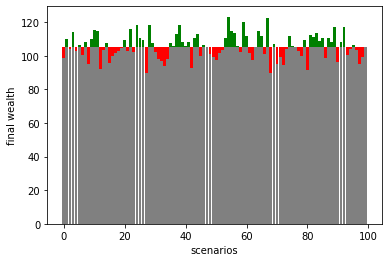

<Figure size 2160x2160 with 0 Axes>

In [24]:
#print("Scenario probabilities\n")
p=np.zeros(num_clusters)
for i in range(num_clusters):
    p[i] = np.count_nonzero(kmeans.labels_== i)/num_samples
    #print("cluster " +str(i)+": {:6.2%}".format(p[i],1))

scenarios = 1 + kmeans.cluster_centers_
    
x_0 = cp.Variable(2)
y = cp.Variable(num_clusters)
w = cp.Variable(num_clusters)
q=1 ;r=10
initial_amount = 100
goal_amount = 105

goal= cp.Maximize(p.T * (q*y - r*w))
prob= cp.Problem(goal,[sum(x_0) == initial_amount, scenarios * x_0 - y + w 
                      ==goal_amount * np.ones(num_clusters),x_0>=0, y>=0, w>=0])

prob.solve(solver = cp.ECOS)

print("optiman asset allocation is stock: " ,x_0.value[1], "   bond :" ,x_0.value[0])

print("optimal allocation: " +  "{:2.2f}".format(x_0.value[1]) + ", " 
     + "{:2.2f}".format(x_0.value[0]))
print("expected return: "+"{:.2%}".format((goal_amount + np.dot(p, y.value-w.value))/initial_amount-1,1))

fig, ax = plt.subplots(1,1)
plt.figure(figsize=(30,30))
ax.bar(range(num_clusters), np.round(goal_amount+y.value,2),color='green',width=0.95)
ax.bar(range(num_clusters), goal_amount, color='red', width =0.95)
ax.bar(range(num_clusters), np.round(goal_amount-w.value,2),color ='grey',width =0.95)
ax.set_xlabel('scenarios')
ax.set_ylabel('final wealth')

In [25]:
(goal_amount + y.value-w.value)

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 98.78675142, 110.00398615, 103.949941  , 113.90628706,
       102.93277247, 106.40588371, 100.17238211, 107.96140093,
        94.99011052, 110.08942324, 115.36388914, 114.60467199,
        92.19092484, 103.55406769, 107.82817851,  95.54212195,
        99.94711443, 101.61179413, 102.89243827, 104.69530869,
       109.44628958, 103.07342349, 115.71680541, 102.24911819,
       118.38858802, 110.66791038, 109.55893291,  89.89918381,
       118.28235984, 107.46937722, 101.97854806,  97.85282516,
        97.00050227,  93.79559265,  97.80399282, 107.44639817,
       105.64277722, 113.1167296 , 118.3447345 , 107.91932727,
       105.54282864, 108.01340046,  92.96754015, 110.36835936,
       112.89030829,  99.9542679 , 106.13839882, 105.00000001,
       100.8816881 ,  99.12331253,  97.49133394, 101.52262112,
       103.10592919, 110.51809408, 123.20902685, 114.65111018,
       113.2969811 , 105.78219433, 102.12742692, 119.87359537,
       111.56838415, 101.43761475,  97.56260516, 105.25

### 2019년 Defined Outcome 모델

In [26]:
    do_portfolio_daily_return = pd.read_excel(os.path.join(data_dir,'daily_do_portfolio.xlsx') , sheet_name = 'daily_return')
    do_portfolio_normalized = pd.read_excel(os.path.join(data_dir,'daily_do_portfolio.xlsx') , sheet_name = 'daily_stadardized')

    
    
spy = daily_price_data_loading('2019-01-02', '2019-12-31' ,'SPY')
bond_t = daily_price_data_loading('2019-01-02', '2019-12-31' ,'AGG')

cap = 1.1390
buffer = 0.8500

do_etf = pd.DataFrame(columns = ['DO', 'bond'])
do_etf['DO'] = spy['adjclose']
do_etf['bond'] = bond_t['adjclose']

do_etf = do_etf.pct_change()
do_etf.iloc[0] = 0.0000



mu = do_etf.mean() * 252
sigma = do_etf.cov() * 252

print("Annual DO ETF Fund Average Return")
print(mu , '\n')
print("Annual volatility of EMP Fund")
print(sigma )

mu = mu.values.T
sigma = sigma.values

num_samples = 10000
stock , bond = np.random.multivariate_normal(mu, sigma, num_samples).T
"""
aa = 100 * pd.DataFrame(stock)
aa.plot.hist(grid=True, bins=1000, rwidth=0.9,color='#607c8e')
plt.title('Average Annual Return before')
plt.xlabel('Return %')
plt.ylabel('Number of Scenario')
plt.grid(axis='y', alpha=0.75)
plt.show()
"""
for i in range(len(stock)):
    if (1 + stock[i]) > cap:
        stock[i] = cap - 1
    elif (1 + stock[i]) < buffer:
        stock[i] = stock[i]+0.15
    elif (1 + stock[i]) > buffer and (1 + stock[i]) < 1:
        stock[i] = 0
    else:
        pass
"""
aa = 100 * pd.DataFrame(stock)
aa.plot.hist(grid=True, bins=1000, rwidth=0.9,color='#607c8e')
plt.title('Average Annual Return before')
plt.xlabel('Return %')
plt.ylabel('Number of Scenario')
plt.grid(axis='y', alpha=0.75)
plt.show()
"""
plt.figure(figsize=(15,15))
plt.scatter(bond,stock, cmap = plt.cm.Reds, s = 10)
plt.ylabel("DO ETF Portfolio" , fontsize = 20)
plt.xlabel("Bond Portfolio" , fontsize = 20)
plt.title("Samples Generated by Gausian Distribution", fontsize = 30)
plt.show()

print("DO Outcome is Return :" ,round(100 * stock.mean() ,2),"% and Standard Deviation ", round(100 * stock.std() , 2),"% \n")

NameError: name 'daily_price_data_loading' is not defined

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


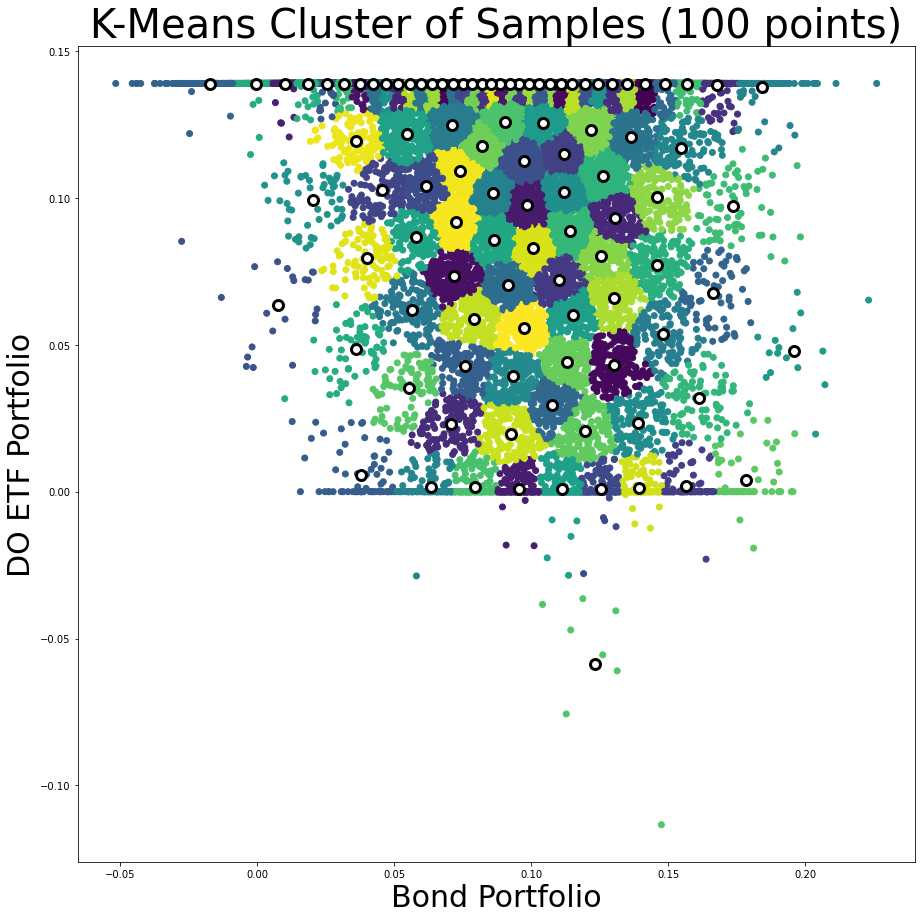

In [19]:
from sklearn.cluster import KMeans

num_clusters =100
kmeans = KMeans(n_clusters = num_clusters).fit(np.transpose([bond,stock]))

plt.figure(figsize=(15,15))
plt.scatter(bond, stock, c=kmeans.labels_)
plt.ylabel("DO ETF Portfolio" , fontsize = 30)
plt.xlabel("Bond Portfolio" , fontsize = 30)
plt.title("K-Means Cluster of Samples (100 points)", fontsize = 40)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,
           color='white', edgecolor = 'black', linewidth=3)

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda64\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
C:\Anaconda64\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multip

optiman asset allocation is stock:  99.9999999831884    bond : 1.6811605661236808e-08
optimal allocation: 100.00, 0.00
expected return: 13.11%


Text(0, 0.5, 'final wealth')

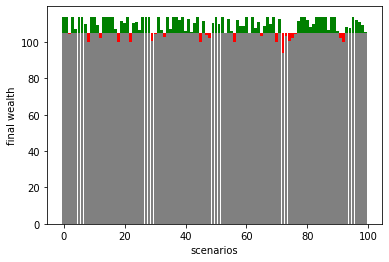

<Figure size 2160x2160 with 0 Axes>

In [20]:
p=np.zeros(num_clusters)
for i in range(num_clusters):
    p[i] = np.count_nonzero(kmeans.labels_== i)/num_samples
    #print("cluster " +str(i)+": {:6.2%}".format(p[i],1))

scenarios = 1 + kmeans.cluster_centers_
    
x_0 = cp.Variable(2)
y = cp.Variable(num_clusters)
w = cp.Variable(num_clusters)
q=1 ;r=10
initial_amount = 100
goal_amount = 105

goal= cp.Maximize(p.T * (q*y - r*w))
prob= cp.Problem(goal,[sum(x_0) == initial_amount, scenarios * x_0 - y + w 
                      ==goal_amount * np.ones(num_clusters),x_0>=0, y>=0, w>=0])

prob.solve(solver = cp.ECOS)

print("optiman asset allocation is stock: " ,x_0.value[1], "   bond :" ,x_0.value[0])

print("optimal allocation: " +  "{:2.2f}".format(x_0.value[1]) + ", " 
     + "{:2.2f}".format(x_0.value[0]))
print("expected return: "+"{:.2%}".format((goal_amount + np.dot(p, y.value-w.value))/initial_amount-1,1))

fig, ax = plt.subplots(1,1)
plt.figure(figsize=(30,30))
ax.bar(range(num_clusters), np.round(goal_amount+y.value,2),color='green',width=0.95)
ax.bar(range(num_clusters), goal_amount, color='red', width =0.95)
ax.bar(range(num_clusters), np.round(goal_amount-w.value,2),color ='grey',width =0.95)
ax.set_xlabel('scenarios')
ax.set_ylabel('final wealth')

In [21]:
(goal_amount + y.value-w.value)

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([113.87888186, 113.89559858, 104.31171189, 113.89074236,
       107.34932442, 113.89640614, 113.89692137, 109.74602155,
       100.09272251, 113.89225535, 113.89490512, 109.31744636,
       102.30289769, 113.88365308, 113.83449424, 113.89418955,
       113.89202864, 107.20316627, 100.19443101, 111.49709797,
       110.28883848, 113.89577115, 100.08977684, 110.41747096,
       111.26312896, 106.35954986, 113.88988183, 113.89466371,
       113.89258586, 100.56306052, 104.26532483, 113.88547702,
       106.77458767, 102.96367435, 113.87860789, 107.03284259,
       113.89551733, 113.89371689, 112.08933257, 113.8950792 ,
       106.19000114, 112.472044  , 105.36597426, 110.16843194,
       113.77091782, 100.17416844, 111.70257102, 103.92804215,
       102.34513047, 110.2127499 , 113.89526072, 109.94592685,
       113.88969704, 104.80203046, 112.56440988, 106.01702727,
       100.10565181, 112.16784651, 108.66048456, 108.57590975,
       113.88972419, 104.86626028, 113.89311528, 107.71

### 2015 - 2021년 Defined Outcome 모델

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda64\lib\site-packages\yahoofinancials\__init__.py:325: DeprecationWarning: UrlOpener style of invoking requests is deprecated. Use newer urlopen functions/methods
  urlopener = UrlOpener()


Annual DO ETF Fund Average Return
DO      0.133103
bond    0.035569
dtype: float64 

Annual volatility of EMP Fund
            DO      bond
DO    0.033532 -0.000073
bond -0.000073  0.001965 



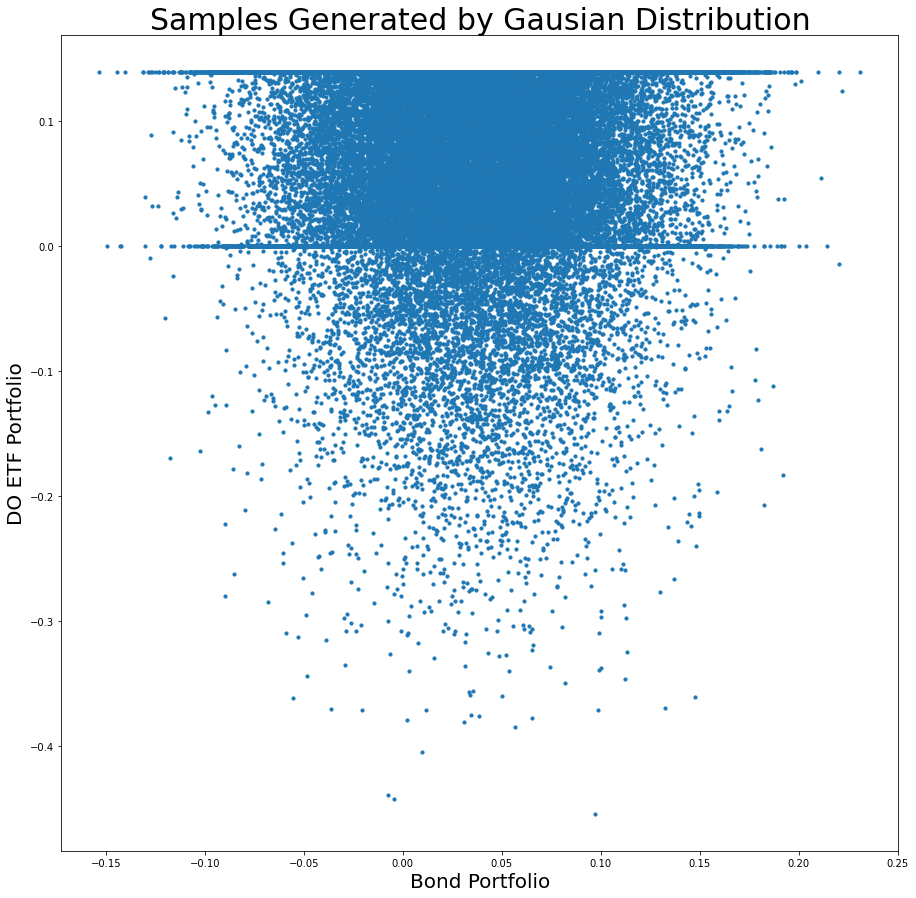

DO Outcome is Return : 8.34 % and Standard Deviation  7.12 % 



In [37]:
spy = daily_price_data_loading('2015-01-02', '2021-01-31' ,'SPY')
bond_t = daily_price_data_loading('2015-01-02', '2021-01-31' ,'AGG')

cap = 1.1390
buffer = 0.8500

do_etf = pd.DataFrame(columns = ['DO', 'bond'])
do_etf['DO'] = spy['adjclose']
do_etf['bond'] = bond_t['adjclose']

do_etf = do_etf.pct_change()
do_etf.iloc[0] = 0.0000

mu = do_etf.mean() * 252
sigma = do_etf.cov() * 252

print("Annual DO ETF Fund Average Return")
print(mu , '\n')
print("Annual volatility of EMP Fund")
print(sigma , "\n")

mu = mu.values.T
sigma = sigma.values

num_samples = 100000
stock , bond = np.random.multivariate_normal(mu, sigma, num_samples).T

"""
aa = pd.DataFrame(stock)
aa.plot.hist(grid=True, bins=100, rwidth=0.9,color='#607c8e')
plt.title('Average Annual Return before')
plt.xlabel('Return %')
plt.ylabel('Number of Scenario')
plt.grid(axis='y', alpha=0.75)
plt.show()
"""
for i in range(len(stock)):
    if (1 + stock[i]) > cap:
        stock[i] = cap - 1
    elif (1 + stock[i]) < buffer:
        stock[i] = stock[i]+0.15
    elif (1 + stock[i]) > buffer and (1 + stock[i]) < 1.0000:
        stock[i] = 0
    else:
        pass
"""    
aa = pd.DataFrame(stock)
aa.plot.hist(grid=True, bins=100, rwidth=0.9,color='#607c8e')
plt.title('Average Annual Return After')
plt.xlabel('Return %')
plt.ylabel('Number of Scenario')
plt.grid(axis='y', alpha=0.75)
plt.show()
"""

plt.figure(figsize=(15,15))
plt.scatter(bond,stock, cmap = plt.cm.Reds, s = 10)
plt.ylabel("DO ETF Portfolio" , fontsize = 20)
plt.xlabel("Bond Portfolio" , fontsize = 20)
plt.title("Samples Generated by Gausian Distribution", fontsize = 30)
plt.show()

print("DO Outcome is Return :" ,round(100 * stock.mean() ,2),"% and Standard Deviation ", round(100 * stock.std() , 2),"% \n")

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


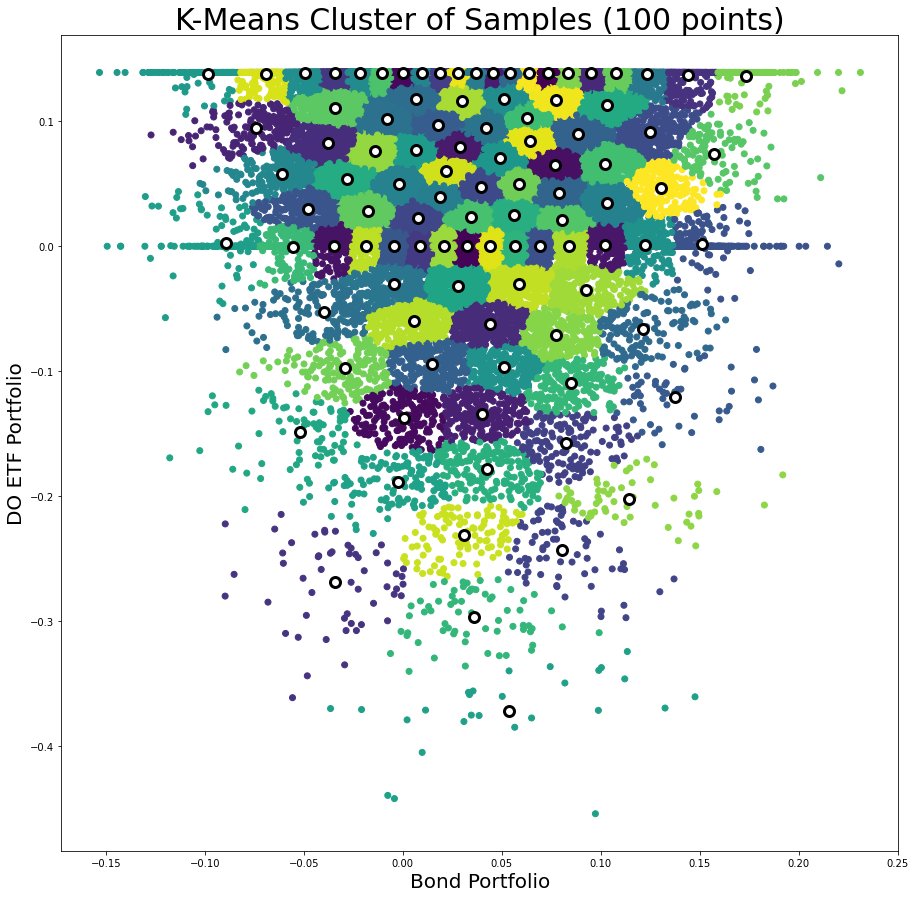

In [38]:
from sklearn.cluster import KMeans

num_clusters =100
kmeans = KMeans(n_clusters = num_clusters).fit(np.transpose([bond,stock]))

plt.figure(figsize=(15,15))
plt.scatter(bond, stock, c=kmeans.labels_)
plt.ylabel("DO ETF Portfolio" , fontsize = 20)
plt.xlabel("Bond Portfolio" , fontsize = 20)
plt.title("K-Means Cluster of Samples (100 points)", fontsize = 30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,
           color='white', edgecolor = 'black', linewidth=3)

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda64\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
C:\Anaconda64\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multip

optiman asset allocation is stock:  52.952495375924144    bond : 47.04750462407587
optimal allocation: 52.95, 47.05
expected return: 6.09%


Text(0, 0.5, 'final wealth')

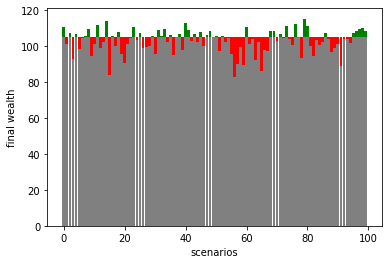

<Figure size 2160x2160 with 0 Axes>

In [39]:
p=np.zeros(num_clusters)
for i in range(num_clusters):
    p[i] = np.count_nonzero(kmeans.labels_== i)/num_samples
    #print("cluster " +str(i)+": {:6.2%}".format(p[i],1))

scenarios = 1 + kmeans.cluster_centers_
    
x_0 = cp.Variable(2)
y = cp.Variable(num_clusters)
w = cp.Variable(num_clusters)
q=1 ;r=10
initial_amount = 100
goal_amount = 105

goal= cp.Maximize(p.T * (q*y - r*w))
prob= cp.Problem(goal,[sum(x_0) == initial_amount, scenarios * x_0 - y + w 
                      ==goal_amount * np.ones(num_clusters),x_0>=0, y>=0, w>=0])

prob.solve(solver = cp.ECOS)

print("optiman asset allocation is stock: " ,x_0.value[1], "   bond :" ,x_0.value[0])

print("optimal allocation: " +  "{:2.2f}".format(x_0.value[1]) + ", " 
     + "{:2.2f}".format(x_0.value[0]))
print("expected return: "+"{:.2%}".format((goal_amount + np.dot(p, y.value-w.value))/initial_amount-1,1))

fig, ax = plt.subplots(1,1)
plt.figure(figsize=(30,30))
ax.bar(range(num_clusters), np.round(goal_amount+y.value,2),color='green',width=0.95)
ax.bar(range(num_clusters), goal_amount, color='red', width =0.95)
ax.bar(range(num_clusters), np.round(goal_amount-w.value,2),color ='grey',width =0.95)
ax.set_xlabel('scenarios')
ax.set_ylabel('final wealth')

## 대표 자산군 모델링

In [40]:
asset_etf_00 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[0])
asset_etf_01 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[1])
asset_etf_02 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[2])
asset_etf_03 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[3])
asset_etf_04 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[4])
asset_etf_05 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[5])
asset_etf_06 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[6])
asset_etf_07 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[7])
asset_etf_08 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[8])
asset_etf_09 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[9])
asset_etf_10 = daily_price_data_loading('2009-01-02', '2021-01-31' ,ASSET_ETFS[10])


asset_etf_portfolio = pd.DataFrame(columns = ASSET_ETFS)
asset_etf_portfolio[ASSET_ETFS[0]] = asset_etf_00['adjclose']
asset_etf_portfolio[ASSET_ETFS[1]] = asset_etf_01['adjclose']
asset_etf_portfolio[ASSET_ETFS[2]] = asset_etf_02['adjclose']
asset_etf_portfolio[ASSET_ETFS[3]] = asset_etf_03['adjclose']
asset_etf_portfolio[ASSET_ETFS[4]] = asset_etf_04['adjclose']
asset_etf_portfolio[ASSET_ETFS[5]] = asset_etf_05['adjclose']
asset_etf_portfolio[ASSET_ETFS[6]] = asset_etf_06['adjclose']
asset_etf_portfolio[ASSET_ETFS[7]] = asset_etf_07['adjclose']
asset_etf_portfolio[ASSET_ETFS[8]] = asset_etf_08['adjclose']
asset_etf_portfolio[ASSET_ETFS[9]] = asset_etf_09['adjclose']
asset_etf_portfolio[ASSET_ETFS[10]] = asset_etf_10['adjclose']

asset_etf_portfolio_return = asset_etf_portfolio.pct_change()
asset_etf_portfolio_return.iloc[0,:] = 0.0000

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda64\lib\site-packages\yahoofinancials\__init__.py:325: DeprecationWarning: UrlOpener style of invoking requests is deprecated. Use newer urlopen functions/methods
  urlopener = UrlOpener()


In [41]:
time = (pd.period_range(start='2009-01-02', end='2021-01-31', freq='M'))
aa = pd.DataFrame(time) 
time = aa.astype('str')

In [42]:
corr_change =  pd.DataFrame(index = time.iloc[:,0] ,columns = ASSET_ETFS)

annual_column = []
for i in range(asset_etf_portfolio_return.shape[0]):
    annual_column.append((str((asset_etf_portfolio_return.index)[i])[:7]))
asset_etf_portfolio_return['YYYY-MM'] = annual_column

#S&P500지수에 대비하여 대표 자산군별 Correlation의 변화를 연도별 추적
for y in time.iloc[:,0] :
    temp = pd.DataFrame(columns = ASSET_ETFS )
    for i in range(asset_etf_portfolio_return.shape[0]):
        if asset_etf_portfolio_return['YYYY-MM'][i] ==  y:
            temp = temp.append(asset_etf_portfolio_return.iloc[i,0:11])
        else:
            pass
    corr_change.loc[y] = ((temp.corr()).iloc[0])
corr_change.to_excel('대표자산군_Corr.xlsx')

C:\Users\kimfr\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


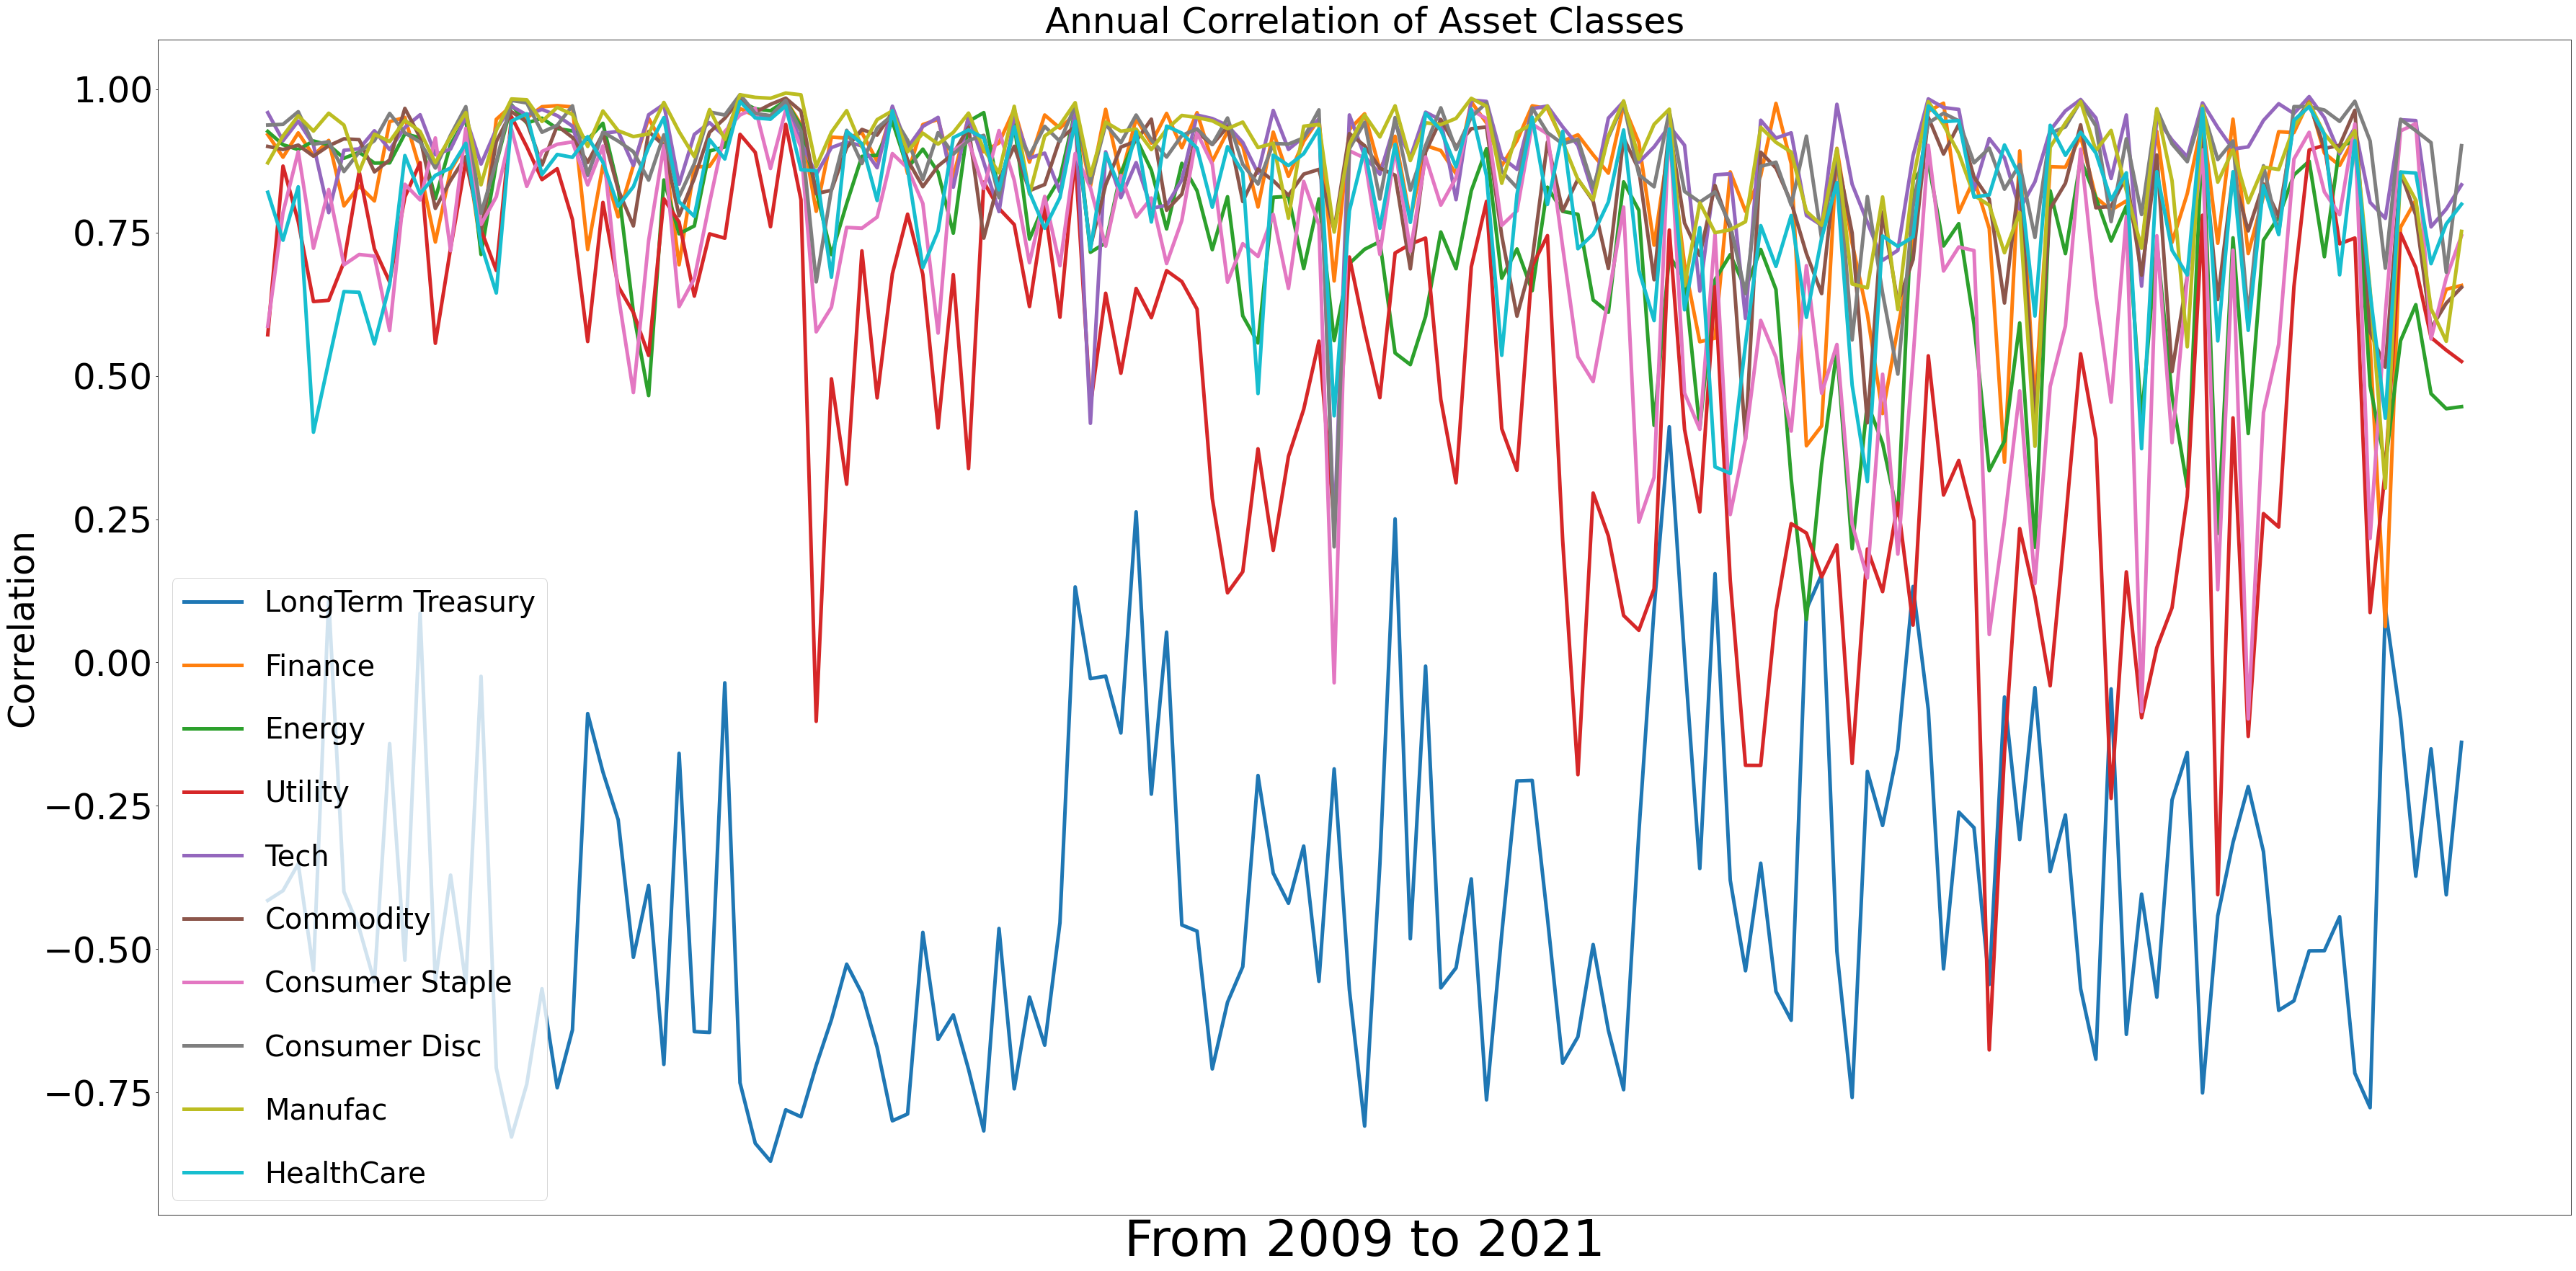

In [50]:
plt.figure(figsize=(60,30))
plt.plot(corr_change['TLT'], label = 'LongTerm Treasury' , linewidth = 5)
plt.plot(corr_change['XLF'], label = 'Finance', linewidth = 5)
plt.plot(corr_change['XLE'], label = 'Energy', linewidth = 5)
plt.plot(corr_change['XLU'], label = 'Utility', linewidth = 5)
plt.plot(corr_change['XLK'], label = 'Tech', linewidth = 5)
plt.plot(corr_change['XLB'], label = 'Commodity', linewidth = 5)
plt.plot(corr_change['XLP'], label = 'Consumer Staple', linewidth = 5)
plt.plot(corr_change['XLY'], label = 'Consumer Disc', linewidth = 5)
plt.plot(corr_change['XLI'], label = 'Manufac', linewidth = 5)
plt.plot(corr_change['XLV'], label = 'HealthCare', linewidth = 5)
plt.xlabel('From 2009 to 2021',fontsize = 70)
plt.ylabel('Correlation',fontsize = 50)
plt.title('Annual Correlation of Asset Classes',fontsize = 50)
plt.legend(labelspacing=1.2 , fontsize = 40)
plt.yticks(fontsize = 50)
plt.xticks([])
plt.show()

In [51]:
time = (pd.period_range(start='2015-01-02', end='2021-01-31', freq='M'))
aa = pd.DataFrame(time) 
time = aa.astype('str')

In [52]:
# Correlation Change를 저장하기 위한 데이터 프레임
corr_change_etf =  pd.DataFrame(index = time.iloc[:,0] ,columns = ['S&P500'] + etfs  )

#비교를 위한 S&P500 지수 삽입
spy = daily_price_data_loading('2015-01-02', '2021-01-31' ,'SPY')
etf_portfolio_daily_return['S&P500'] = spy['adjclose']
etf_portfolio_daily_return = etf_portfolio_daily_return[['S&P500'] + etfs]

#연도별 or 월별 분석을 위한 분류자 생성
annual_column = []
for i in range(etf_portfolio_daily_return.shape[0]):
    annual_column.append((str((etf_portfolio_daily_return.index)[i])[:7]))
etf_portfolio_daily_return['YYYY-MM'] = annual_column

#S&P500지수에 대비하여 대표 자산군별 Correlation의 변화를 연도별 추적
for y in  time.iloc[:,0]:
    temp = pd.DataFrame(columns =  ['S&P500'] + etfs )
    for i in range(etf_portfolio_daily_return.shape[0]):
        if (str(etf_portfolio_daily_return.index[i])[:7]) ==  y:
            temp = temp.append(etf_portfolio_daily_return.iloc[i,:])
        else:
            pass
    corr_change_etf.loc[y] = ((temp.corr()).iloc[0])
corr_change_etf.to_excel('EMP펀드_corr.xlsx')

C:\Anaconda64\lib\site-packages\yahoofinancials\__init__.py:325: DeprecationWarning: UrlOpener style of invoking requests is deprecated. Use newer urlopen functions/methods
  urlopener = UrlOpener()


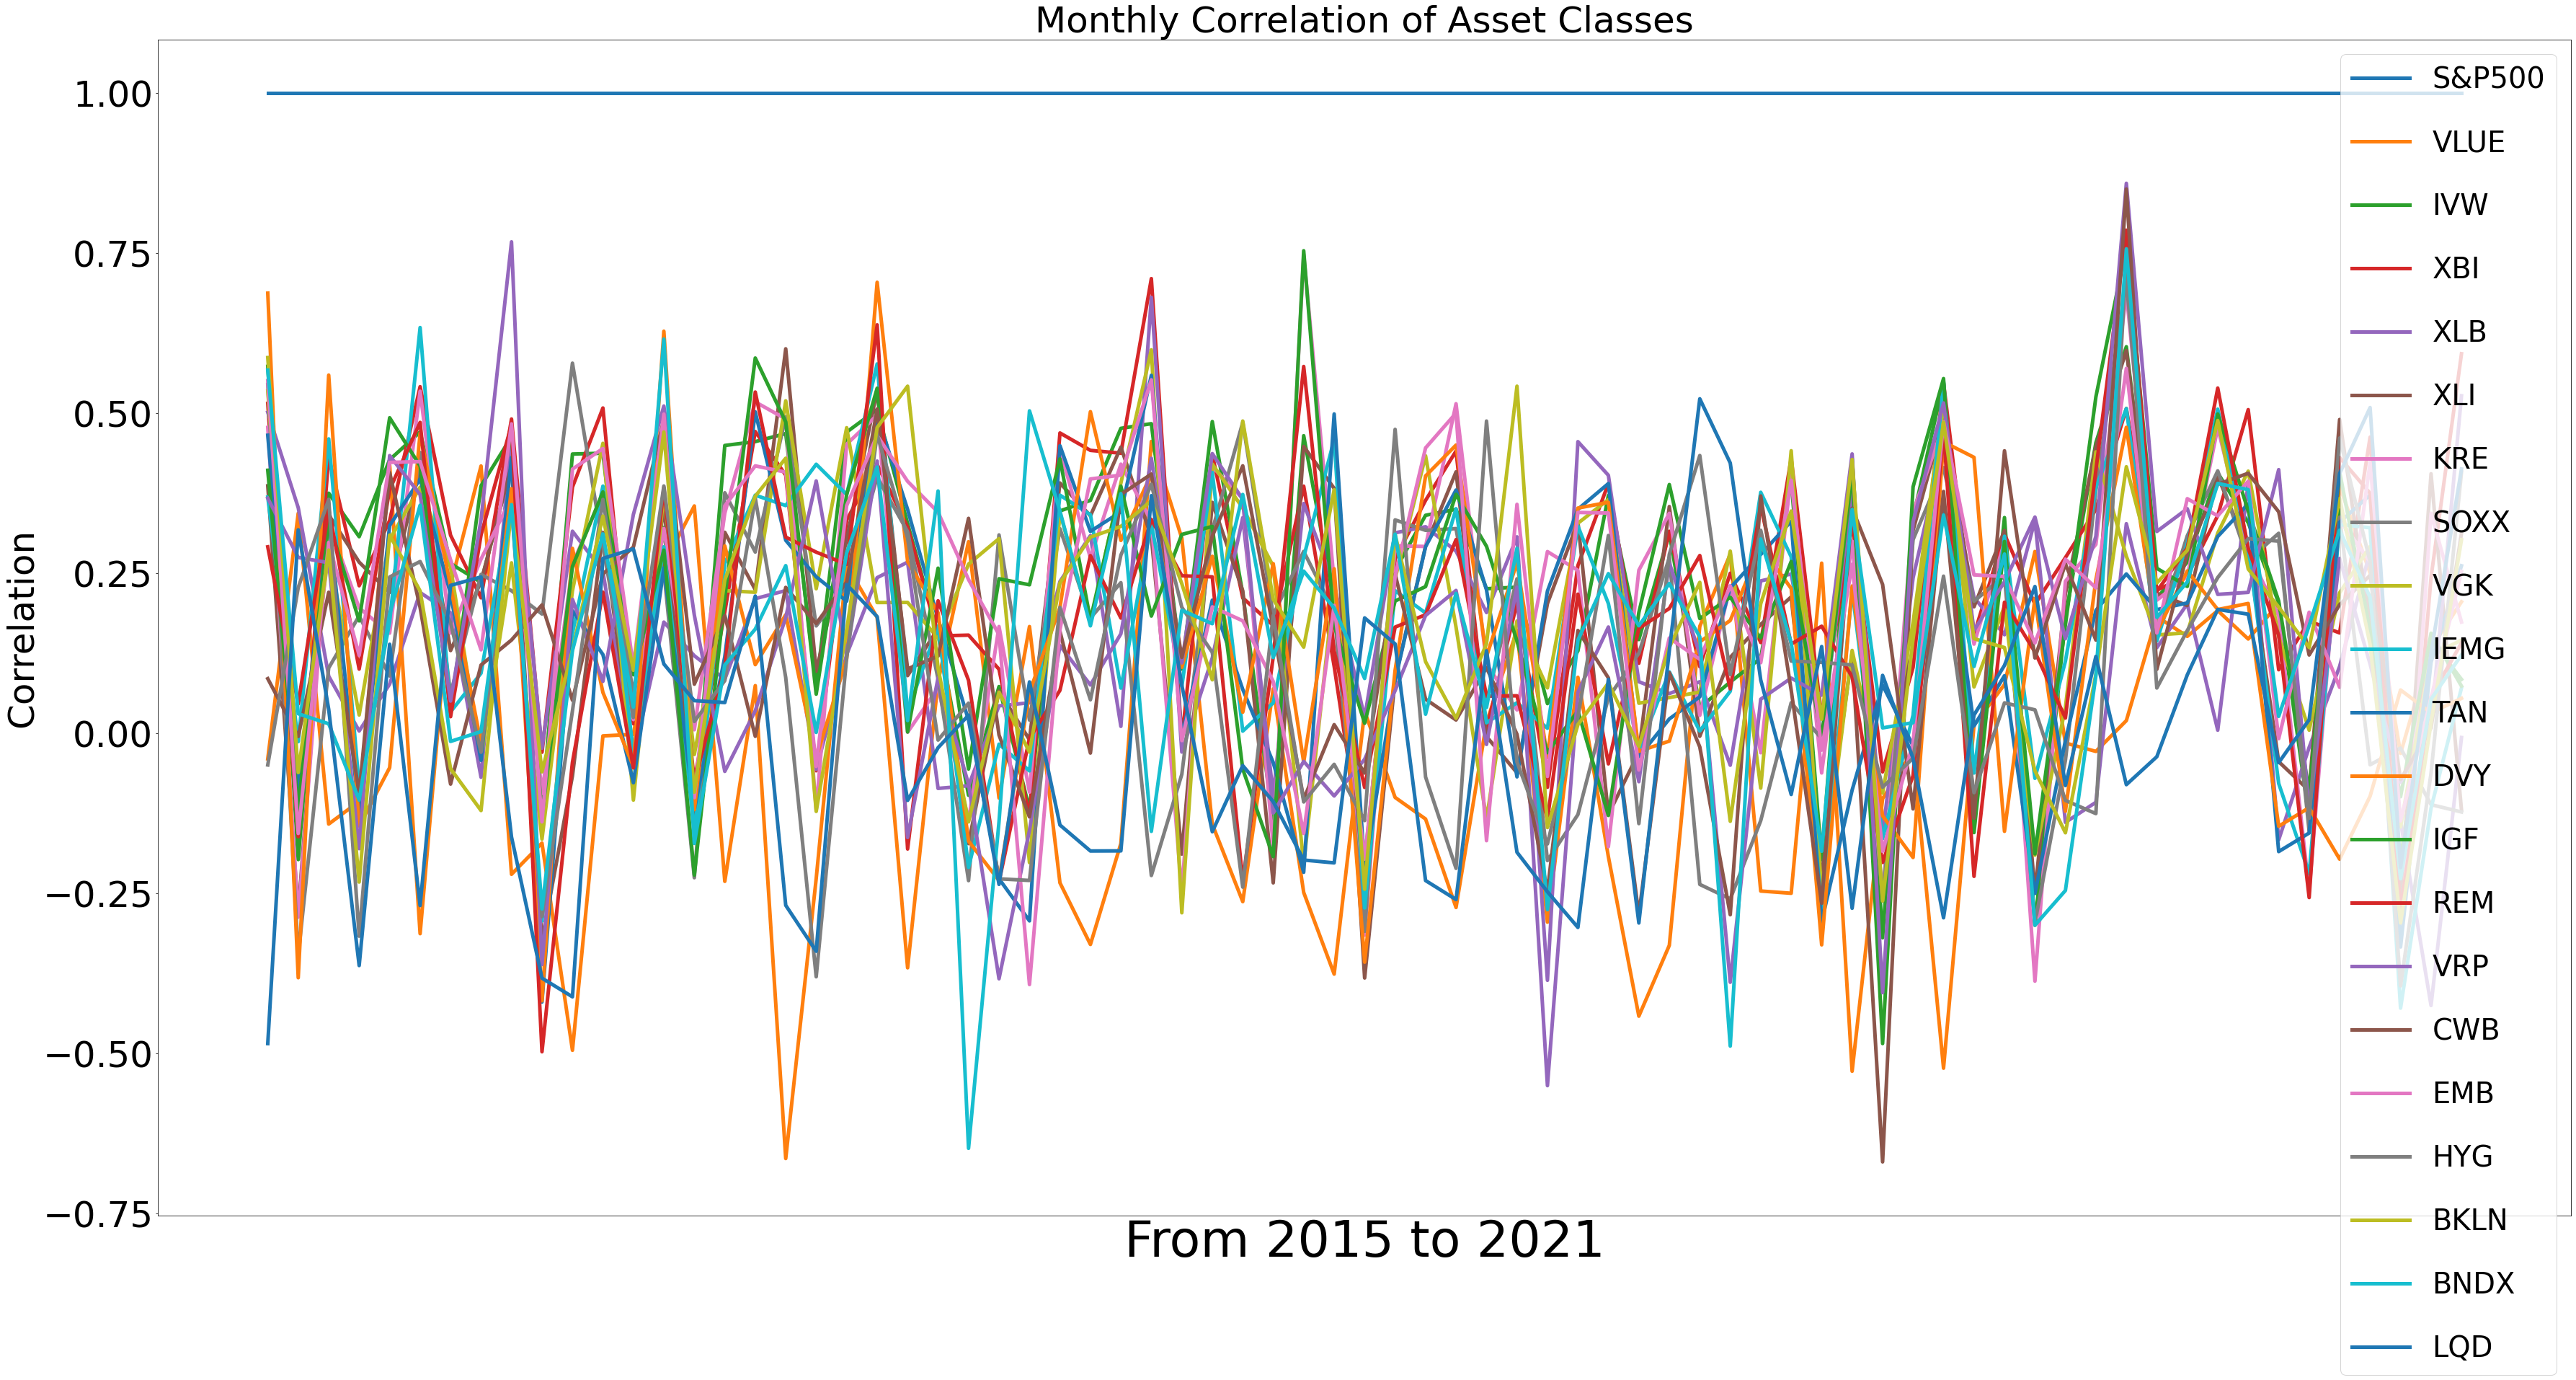

In [53]:
plt.figure(figsize=(60,30))
for lab in corr_change_etf.columns:
    plt.plot(corr_change_etf[lab] , label = lab, linewidth = 5)
plt.ylabel('Correlation',fontsize = 50)
plt.xlabel('From 2015 to 2021',fontsize = 70)
plt.title('Monthly Correlation of Asset Classes',fontsize = 50)
plt.legend(labelspacing=1.2 , fontsize = 40)
plt.yticks(fontsize = 50)
plt.xticks([])
plt.show()

In [54]:
risk_free = monthly_price_data_loading('2009-01-02', '2021-01-31' ,'^TNX')
risk_free_rate = 1.00
for i in range (risk_free.shape[0]):
    risk_free_rate = risk_free_rate * (1+(risk_free['adjclose'][i]/100))
risk_free_rate = 100 * ((risk_free_rate**(1/risk_free.shape[0]))-1)
print("risk free rate is : ", risk_free_rate, "%  treasury bill 10 years yield")

risk free rate is :  2.3023628577713895 %  treasury bill 10 years yield


In [55]:
spy = monthly_price_data_loading('2009-01-02', '2021-01-31' ,'SPY')
do_price = pd.DataFrame(spy['adjclose'])

In [56]:
do_price

adjclose
formatted_date            
2009-01-01       65.067177
2009-02-01       58.075756
2009-03-01       62.466980
2009-04-01       69.164375
2009-05-01       73.207291
...                    ...
2020-09-01      332.139008
2020-10-01      325.153992
2020-11-01      360.523224
2020-12-01      372.293060
2021-01-01      370.070007

[145 rows x 1 columns]